# Convolve Epoch 2
## Round 2
---


# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [2]:

# Initializing training and final testing data 

train_data_filename = "/mnt/c/Users/parth/Desktop/CODING/Convolve_Round2/dataset/Dev_data_to_be_shared.xlsx"
test_data_filename = "/mnt/c/Users/parth/Desktop/CODING/Convolve_Round2/dataset/validation_data_to_be_shared.xlsx"


Reading the `Excel` files

In [3]:
train_df = pd.read_excel(train_data_filename, header=0)

In [4]:
train_df.to_csv("train_df.csv",  
                  index = None, 
                  header=True) 

In [5]:
test_df = pd.read_excel(test_data_filename, header=0)

In [6]:
test_df.to_csv("test_df.csv",  
                index = None, 
                header=True) 

Reading the `.info()`  

In [7]:
train_df.describe()


,Primary key,Target,account_opening_date,demog_1,demog_3,demog_5,demog_6,demog_7,demog_8,demog_9,...,others_41,txn_80,txn_81,demog_39,demog_41,others_42,others_43,others_44,others_45,demog_42
count,100000.000000,100000.000000,100000,96331.000000,99994.000000,99975.000000,99999.000000,99994.0,96249.000000,87086.000000,...,99999.000000,42522.000000,48535.000000,100000.000000,100000.00000,2105.000000,4579.000000,874.000000,694.000000,100000.000000
mean,50000.500000,0.020000,2023-01-25 16:25:19.200000512,79.543376,101.323279,3.290163,1.017180,1.0,41.191701,0.326103,...,0.002220,34.742439,22.679159,0.999940,0.96329,87.887886,62.024896,28.808924,96.700288,0.958470
min,1.000000,0.000000,2022-12-01 00:00:00,51.000000,101.000000,1.000000,1.000000,1.0,41.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25000.750000,0.000000,2022-12-26 00:00:00,55.000000,101.000000,3.000000,1.000000,1.0,41.000000,0.000000,...,0.000000,2.000000,6.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,50000.500000,0.000000,2023-01-25 00:00:00,55.000000,101.000000,4.000000,1.000000,1.0,41.000000,0.000000,...,0.000000,5.000000,12.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,75000.250000,0.000000,2023-02-24 00:00:00,55.000000,101.000000,4.000000,1.000000,1.0,41.000000,1.000000,...,0.000000,15.000000,27.000000,1.000000,1.00000,2.000000,4.000000,0.000000,0.000000,1.000000
max,100000.000000,1.000000,2023-03-31 00:00:00,421.000000,213.000000,4.000000,4.000000,1.0,52.000000,1.000000,...,1.000000,13907.000000,7810.000000,1.000000,1.00000,4049.000000,3283.000000,2922.000000,3603.000000,1.000000
std,28867.657797,0.140001,NaN,89.498781,5.350011,0.833449,0.182553,0.0,0.641951,0.468788,...,0.047065,251.845838,49.903348,0.007746,0.18805,298.951251,200.384998,136.963658,370.396893,0.199514


In [8]:
train_df.dtypes


Primary key                      int64
Target                           int64
account_opening_date    datetime64[ns]
country_code                    object
demog_1                        float64
                             ...      
others_43                      float64
others_44                      float64
others_45                      float64
demog_42                         int64
demog_43                        object
Length: 178, dtype: object

In [9]:
train_df.nunique()


Primary key             100000
Target                       2
account_opening_date       121
country_code                49
demog_1                     16
                         ...  
others_43                  479
others_44                   99
others_45                  135
demog_42                     2
demog_43                     3
Length: 178, dtype: int64

In [10]:
train_df.isnull().sum()

Primary key                 0
Target                      0
account_opening_date        0
country_code             3666
demog_1                  3669
                        ...  
others_43               95421
others_44               99126
others_45               99306
demog_42                    0
demog_43                 3705
Length: 178, dtype: int64

# Seeing the `columns` of the `train_df`

In [11]:
train_df.columns

Index(['Primary key', 'Target', 'account_opening_date', 'country_code',
       'demog_1', 'demog_2', 'income', 'demog_3', 'city_tier', 'occupation',
       ...
       'demog_39', 'email_domain', 'demog_40', 'demog_41', 'others_42',
       'others_43', 'others_44', 'others_45', 'demog_42', 'demog_43'],
      dtype='object', length=178)

# Plotting the `cols` against `Target`

In [12]:

# Exclude 'Primary key' column and split into batches of 40 columns each
columns_to_plot = [col for col in train_df.columns if col != 'Primary key']
batch_size = 40

# Create a directory to save the images (change the path as needed)
image_directory = '/mnt/c/Users/parth/Desktop/CODING/Convolve_Round2/image_directory/'
os.makedirs(image_directory, exist_ok=True)

# Create plots for the first batch of attributes against 'Target' and save as images
for i in range(0, min(batch_size, len(columns_to_plot))):
    column = columns_to_plot[i]
    fig = px.histogram(train_df, x=column, color='Target', title=f'{column} vs Target')
    
    # Save the figure as an image
    image_file_path = f'{image_directory}{column}_vs_Target.png'
    pio.write_image(fig, image_file_path)
    



In [13]:
# Create plots for the second batch of attributes against 'Target'
for i in range(batch_size, 2 * batch_size):
    if i >= len(columns_to_plot):
        break
    column = columns_to_plot[i]
    fig = px.histogram(train_df, x=column, color='Target', title=f'{column} vs Target')
    # Save the figure as an image
    image_file_path = f'{image_directory}{column}_vs_Target.png'
    pio.write_image(fig, image_file_path)




In [14]:
# Create plots for the third batch of attributes against 'Target'
for i in range(2 * batch_size, 3 * batch_size):
    if i >= len(columns_to_plot):
        break
    column = columns_to_plot[i]
    fig = px.histogram(train_df, x=column, color='Target', title=f'{column} vs Target')
    
    # Save the figure as an image
    image_file_path = f'{image_directory}{column}_vs_Target.png'
    pio.write_image(fig, image_file_path)



In [15]:
# Create plots for the fourth batch of attributes against 'Target'
for i in range(3 * batch_size, len(columns_to_plot)):
    column = columns_to_plot[i]
    fig = px.histogram(train_df, x=column, color='Target', title=f'{column} vs Target')
    # Save the figure as an image
    image_file_path = f'{image_directory}{column}_vs_Target.png'
    pio.write_image(fig, image_file_path)



### The images are saved in a file as they are heavy files and slowing down the notebook.
---


# What we infer from the graphs 

- `txn_61`
  - 1871 points have target 1
  - Value 0 -> Always
- `txn_62`
  - Value 0 -> 1866 have target 1
  - Value 1 -> 696 have target 0, very few have target 1
- `txn_63`
  - Value 0 -> 1867 have target 1
  - At other datapoints very less values of both targets
- `txn_64`
  - Value 0 -> Many mules , target value 1
  - Mules happen at single digit values, but it takes values till 200.
- `txn_65`
  - Value -> Always 0
  - 1871 have target 1
- `txn_66`
  - 1800s have target 1
  - Value 0 -> Always
- `txn_67`
  - Target 1 at Values 0 like before
- `txn_68`
  - Wide range of values from 0 - 17000
  - Value 0 -> 1800s mules
  - Few mules , max till value till 700.
- `txn_69`
  - Value 0 -> 1200s
  - Value 1 -> 500s
  - Value 2 -> 150s
  - Value 3 -> 70s
  - Mules till 15.
- `txn_70`
  - Value only 0, 1800s target 1
- `txn_73`
  - Different & Visible pattern
  - Decreasing graph
- `txn_74`
  - Different pattern
  - Like txn_73
- `txn_75`
  - Different pattern like txn_74
- `txn_76`
  - Different and like txn_75
- `txn_77`
  - Slightly higher peak at zero, like txn_76
  - Different pattern, slight right skewness
- `txn_78`
  - Like `txn_77`
- `txn_79`
  - Like txn_78

`txn_73` :- `txn_80` ,`txn_81`(Peak spikes), 
  

- `others_1`
  - Value 0 -> 1700s Mules
  - Value 1 -> 200s Mules
- `others_3`
  - Proportion of mules at Value 1 more
- `others_6`
  - Different pattern
  - Number of Mules at lower values are higher in comparison to later values.
- `others_7`
  - Same like other_6, looks important.
- `others_8`
  - Mules at lower values only.
- `others_9`
  - Looks important, like others_6.
- `others_10`
  - Looks like others_6
- `others_12`
  - Looks like others_6
- `others_11`
  - Like others_8

`others_6` :- `others_13` ,`others_15` , `others_16`  
`others_8` :- `others_14` , `others_17` , `others_18` , `others_19`, `others_20` ,`others_21` ,`others_22` ,`others_24`, `others_25` ,`others_23` , `others_26` ,`others_29`,`others_30`,`others_31`,`others_32`,`others_37`



- `others_36`
  - Different pattern, mules at higher values.


`email_domain` :No pattern as such

`demog_40` , `demog_43`: Categorical , interesting, column . High value imples more mules.
`others_42` : Mules at lower values.



- `Target`
Only 2% of our targets are 1, such low number of mules banks makes sense

- `Dates`
Dates have been given last 4 months of financial year 2022-23. There is slight rise in mules in later part of January

- `Country Code`
Most of the people are from India(above 90%) and all mules are Indians

- `Demog_2`
There is a significant rise in Mule values around 2 and 3 

- `Income`
There is a trend of more mules with lower income values.

- `City-Tier`
Higher number of mules from Rural area, and significantly less from Tier-1

- `Occupation`
Saliered and Student have very low percentage of mules, Self-Employed have significantly high number of mules.

- `Demog_4`
Most frauders have N value but 90% of values are itself N.

- `Demog_9`
Higher percent of values from -0.5 to 0.5

- `Deomog_13`
Higher percent of values from -0.5 to 0.5

- `Deomog_14`
Higher percent of values from -0.5 to 0.5

- `Demog_20`
Significant drop from 0.5 to 1.5

- `Demog_21`
Significant drop from 0.5 to 1.5

- `Demog_22`
All mules in Y, but very low number of N in total

- `os`
Significant mules in Android, only 0.8% of IoS are mules

- `tx_1-15`
Most values are 0 itself(distribution is also very similar expect very few outliers)

- `tx_53`
Still mules around 0 and 1 values but different from general pattern, mules are more on 0 than 1.

- `tx_54`
High number of values at 2 but very low mules.

- `demog_23` , `demog_32`
Lower values have higher mules.



# Making truncated DF

Based on our observation , new truncated dataframe is made with those features removed that we surely think are not important

In [16]:

# Create empty DataFrames to store numerical and categorical columns
truncated_df_numerical = pd.DataFrame()
truncated_df_categorical = pd.DataFrame()

# Loop through the columns in train_df and categorize them
for column in train_df.columns:
    if train_df[column].dtype in ['int64', 'float64']:
        # Numerical column
        truncated_df_numerical[column] = train_df[column]
    else:
        # Categorical column
        truncated_df_categorical[column] = train_df[column]

# Now, truncated_df_numerical will contain all numerical columns,
# and truncated_df_categorical will contain all categorical columns


/tmp/ipykernel_24228/1953221906.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_24228/1953221906.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_24228/1953221906.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_24228/1953221906.py:9: Performance

In [17]:
truncated_df_numerical.head()

,Primary key,Target,demog_1,demog_3,demog_5,demog_6,demog_7,demog_8,demog_9,demog_11,...,others_41,txn_80,txn_81,demog_39,demog_41,others_42,others_43,others_44,others_45,demog_42
0,1,0,53.0,101.0,3.0,1.0,1.0,41.0,0.0,0.0,...,0.0,1.0,1.0,1,1,NaN,0.0,NaN,NaN,1
1,2,0,55.0,101.0,2.0,1.0,1.0,41.0,1.0,0.0,...,0.0,12.0,28.0,1,1,NaN,NaN,NaN,NaN,1
2,3,0,55.0,101.0,4.0,1.0,1.0,41.0,0.0,0.0,...,0.0,5.0,48.0,1,1,NaN,NaN,NaN,NaN,1
3,4,0,53.0,101.0,4.0,1.0,1.0,41.0,NaN,0.0,...,0.0,1.0,10.0,1,1,NaN,NaN,NaN,NaN,1
4,5,0,55.0,101.0,4.0,1.0,1.0,41.0,0.0,0.0,...,0.0,NaN,NaN,1,1,NaN,NaN,NaN,NaN,1


In [18]:
truncated_df_categorical['Primary key'] = truncated_df_numerical['Primary key']
truncated_df_categorical['Target'] = truncated_df_numerical['Target']


truncated_df_categorical.head()

,account_opening_date,country_code,demog_2,income,city_tier,occupation,demog_4,demog_10,demog_22,os,email_domain,demog_40,demog_43,Primary key,Target
0,2023-02-18,IN,3,100001 to 5L,Rural,Self_Employed,N,N,Y,ios,gmail,low,medium,1,0
1,2023-02-01,IN,1,0 to 1L,Tier 1,Salaried,N,N,Y,and,gmail,High,High,2,0
2,2022-12-09,IN,3,0 to 1L,Tier 2,Self_Employed,N,N,Y,and,gmail,medium,High,3,0
3,2023-03-31,IN,3,100001 to 5L,Tier 7,Self_Employed,N,N,Y,and,gmail,High,High,4,0
4,2023-01-17,IN,6,0 to 1L,Tier 1,Student,N,N,Y,and,gmail,low,medium,5,0


### Filling `NaN` values with `0`

In [19]:
truncated_df_numerical_filled = truncated_df_numerical.fillna(0)
truncated_df_categorical_filled = truncated_df_categorical.fillna(0)

# Considering only important columns based on previous analysis

In [20]:
truncated_df_numerical_filled.columns

Index(['Primary key', 'Target', 'demog_1', 'demog_3', 'demog_5', 'demog_6',
       'demog_7', 'demog_8', 'demog_9', 'demog_11',
       ...
       'others_41', 'txn_80', 'txn_81', 'demog_39', 'demog_41', 'others_42',
       'others_43', 'others_44', 'others_45', 'demog_42'],
      dtype='object', length=165)

In [21]:
truncated_df_categorical_filled.columns

Index(['account_opening_date', 'country_code', 'demog_2', 'income',
       'city_tier', 'occupation', 'demog_4', 'demog_10', 'demog_22', 'os',
       'email_domain', 'demog_40', 'demog_43', 'Primary key', 'Target'],
      dtype='object')

In [22]:

# List of important column names
important_columns = ["Primary key", "Target","txn_62","txn_64","txn_68","txn_69","txn_73","txn_74","txn_75","txn_76","txn_77","txn_79","txn_80","txn_81","others_1","others_3","others_6","others_7","others_8","others_9","others_10","others_12","others_11","others_13","others_15","others_16","others_14","others_17","others_18","others_19","others_20","others_21","others_22","others_24","others_25","others_23","others_26","others_29","others_30","others_31","others_32","others_37","others_36","demog_40","demog_43","others_42","Dates","country_code","demog_2","income","city_tier","occupation","demog_4","demog_9","demog_13","demog_14","demog_20","demog_21","demog_22","os","txn_53","txn_54","demog_23","demog_32"]  # Add your important columns here


# Create new dataframes with only the important columns for numerical data
new_df_numerical = truncated_df_numerical_filled[["Primary key", "Target"]]  # Initialize with Primary Key and Target columns

for col in important_columns[2:]:
    if col in truncated_df_numerical_filled.columns:
        new_df_numerical[col] = truncated_df_numerical_filled[col]

# Create new dataframes with only the important columns for categorical data
new_df_categorical = truncated_df_categorical_filled[["Primary key", "Target"]]  # Initialize with Primary Key and Target columns

for col in important_columns[2:]:
    if col in truncated_df_categorical_filled.columns:
        new_df_categorical[col] = truncated_df_categorical_filled[col]


/tmp/ipykernel_24228/3919568207.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_24228/3919568207.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_24228/3919568207.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykerne

In [23]:
len(new_df_numerical.columns)-2+len(new_df_categorical.columns)-2 + 2

63

In [24]:
new_df_numerical.columns

Index(['Primary key', 'Target', 'txn_62', 'txn_64', 'txn_68', 'txn_69',
       'txn_73', 'txn_74', 'txn_75', 'txn_76', 'txn_77', 'txn_79', 'txn_80',
       'txn_81', 'others_1', 'others_3', 'others_6', 'others_7', 'others_8',
       'others_9', 'others_10', 'others_12', 'others_11', 'others_13',
       'others_15', 'others_16', 'others_14', 'others_17', 'others_18',
       'others_19', 'others_20', 'others_21', 'others_22', 'others_24',
       'others_25', 'others_23', 'others_26', 'others_29', 'others_30',
       'others_31', 'others_32', 'others_37', 'others_36', 'others_42',
       'demog_9', 'demog_13', 'demog_14', 'demog_20', 'demog_21', 'txn_53',
       'txn_54', 'demog_23', 'demog_32'],
      dtype='object')

In [25]:
new_df_categorical.columns

Index(['Primary key', 'Target', 'demog_40', 'demog_43', 'country_code',
       'demog_2', 'income', 'city_tier', 'occupation', 'demog_4', 'demog_22',
       'os'],
      dtype='object')

In [26]:
new_df_categorical

,Primary key,Target,demog_40,demog_43,country_code,demog_2,income,city_tier,occupation,demog_4,demog_22,os
0,1,0,low,medium,IN,3,100001 to 5L,Rural,Self_Employed,N,Y,ios
1,2,0,High,High,IN,1,0 to 1L,Tier 1,Salaried,N,Y,and
2,3,0,medium,High,IN,3,0 to 1L,Tier 2,Self_Employed,N,Y,and
3,4,0,High,High,IN,3,100001 to 5L,Tier 7,Self_Employed,N,Y,and
4,5,0,low,medium,IN,6,0 to 1L,Tier 1,Student,N,Y,and
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1,High,High,IN,2,0 to 1L,Rural,Self_Employed,N,Y,and
99996,99997,1,low,medium,IN,6,100001 to 5L,Rural,Student,N,Y,and
99997,99998,1,High,medium,IN,1,100001 to 5L,Tier 6,Salaried,N,Y,and
99998,99999,1,High,High,IN,1,5L to 10L,Tier 1,Other,N,Y,ios


In [27]:
cols = ["demog_40","demog_43","country_code","demog_2","income","city_tier","occupation","demog_4","demog_22","os"]

for col in cols:
    new_df_categorical[col] = new_df_categorical[col].astype(str)
    
new_df_categorical

/tmp/ipykernel_24228/1944393124.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_24228/1944393124.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_24228/1944393124.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2

,Primary key,Target,demog_40,demog_43,country_code,demog_2,income,city_tier,occupation,demog_4,demog_22,os
0,1,0,low,medium,IN,3,100001 to 5L,Rural,Self_Employed,N,Y,ios
1,2,0,High,High,IN,1,0 to 1L,Tier 1,Salaried,N,Y,and
2,3,0,medium,High,IN,3,0 to 1L,Tier 2,Self_Employed,N,Y,and
3,4,0,High,High,IN,3,100001 to 5L,Tier 7,Self_Employed,N,Y,and
4,5,0,low,medium,IN,6,0 to 1L,Tier 1,Student,N,Y,and
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1,High,High,IN,2,0 to 1L,Rural,Self_Employed,N,Y,and
99996,99997,1,low,medium,IN,6,100001 to 5L,Rural,Student,N,Y,and
99997,99998,1,High,medium,IN,1,100001 to 5L,Tier 6,Salaried,N,Y,and
99998,99999,1,High,High,IN,1,5L to 10L,Tier 1,Other,N,Y,ios


### Systematically Exploring Modeling Strategies

Scikit-learn offers the following cheatsheet to decide which model to pick.

![](https://scikit-learn.org/stable/_static/ml_map.png)




## Considering the properties of our `Dataset`

1. SGD Classifier
2. SVC 
3. KNN
4. Linear SVC
5. Random Forest

In [28]:
model_accuracy = {}

# **SGD Classifier**

In [29]:

# Load your data into two separate DataFrames (numerical_df and categorical_df)

# Assuming numerical_df and categorical_df have the same primary key and target label column names
primary_key_col = 'Primary key'
target_col = 'Target'

# Merge the numerical and categorical DataFrames on the primary key column
merged_df = pd.merge(new_df_categorical, new_df_numerical, on=[primary_key_col,target_col])

# Split the merged data into train and test sets
X = merged_df.drop(columns=[primary_key_col, target_col])
y = merged_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

# Define preprocessing for numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # You can customize this preprocessing as needed
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Use one-hot encoding for categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create an SGD classifier and define your model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SGDClassifier())])

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

model_accuracy['SGDClassifier'] = accuracy



Accuracy: 0.9931212121212121


In [30]:
# Dummy Classifier
from sklearn.dummy import DummyClassifier

# Create a dummy model that always predicts 0 (most frequent class)
dummy_model = DummyClassifier(strategy="most_frequent")

# Train the dummy model on the training data
dummy_model.fit(X_train, y_train)

# Make predictions using the dummy model
dummy_y_pred = dummy_model.predict(X_test)

# Calculate accuracy of the dummy model
dummy_accuracy = accuracy_score(y_test, dummy_y_pred)
print(f"Dummy Model Accuracy: {dummy_accuracy}")

print(f"Our model stats : {accuracy-dummy_accuracy} better")

Dummy Model Accuracy: 0.98
Our model stats : 0.013121212121212089 better


True Negatives: 32250
False Positives: 90
False Negatives: 137
True Positives: 523


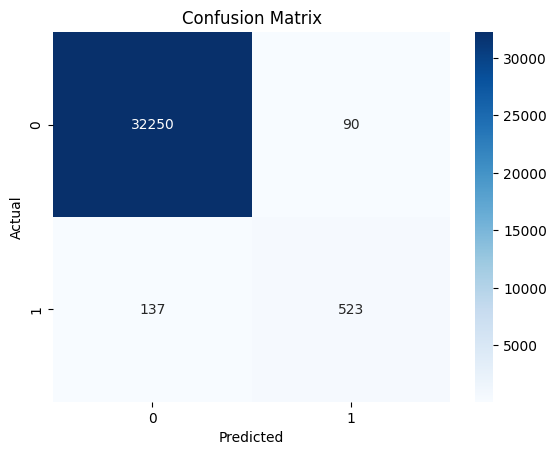

Precision: 0.8531810766721044
Recall: 0.7924242424242425
F1 Score: 0.8216810683424981


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()

print(f"True Negatives: {true_negatives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"True Positives: {true_positives}")

# Visualize the confusion matrix
confusion_matrix_plot = [[true_negatives, false_positives], [false_negatives, true_positives]]
sns.heatmap(confusion_matrix_plot, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

### Testing on only 1's to know mule detection accuracy

In [32]:
# Create a test dataset with only rows having label 1
test_data_positive = merged_df[merged_df['Target'] == 1].copy()

# Split the test data into features (X_test_positive) and labels (y_test_positive)
X_test_positive = test_data_positive.drop(columns=[primary_key_col])
y_test_positive = test_data_positive['Target']  # Use the correct column name for the target variable

# Make predictions using your model on the test data with label 1s
y_pred_positive = model.predict(X_test_positive)

# Calculate accuracy on the positive class predictions
positive_accuracy = accuracy_score(y_test_positive, y_pred_positive)
print(f"Accuracy on Positive Class: {positive_accuracy}")


Accuracy on Positive Class: 0.8025


# **Formating the `test_df` for the final prediction**

In [33]:
# List of important column names
important_columns = ["Primary key", "Target","txn_62","txn_64","txn_68","txn_69","txn_73","txn_74","txn_75","txn_76","txn_77","txn_79","txn_80","txn_81","others_1","others_3","others_6","others_7","others_8","others_9","others_10","others_12","others_11","others_13","others_15","others_16","others_14","others_17","others_18","others_19","others_20","others_21","others_22","others_24","others_25","others_23","others_26","others_29","others_30","others_31","others_32","others_37","others_36","demog_40","demog_43","others_42","Dates","country_code","demog_2","income","city_tier","occupation","demog_4","demog_9","demog_13","demog_14","demog_20","demog_21","demog_22","os","txn_53","txn_54","demog_23","demog_32"]  # Add your important columns here

total_cols = test_df.columns.to_list()

for col in total_cols :
    if(col not in important_columns):
        test_df = test_df.drop(columns=[col])
        

test_df

,Primary key,country_code,demog_2,income,city_tier,occupation,demog_4,demog_9,demog_13,demog_14,...,others_32,demog_23,demog_32,others_36,others_37,txn_80,txn_81,demog_40,others_42,demog_43
0,9000001,IN,2,5L to 10L,Tier 7,Self_Employed,N,1.0,1.0,0.0,...,0.0,133.0,1.0,1.0,0.0,6.0,9.0,High,NaN,High
1,9000002,IN,1,100001 to 5L,Tier 5,Salaried,N,NaN,1.0,0.0,...,0.0,202.0,0.0,0.0,0.0,NaN,NaN,low,NaN,medium
2,9000003,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,211.0,0.0,0.0,0.0,14.0,25.0,low,NaN,medium
3,9000004,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,243.0,0.0,1.0,0.0,2.0,21.0,medium,NaN,High
4,9000005,IN,1,100001 to 5L,Tier 5,Other,N,0.0,1.0,0.0,...,0.0,190.0,1.0,0.0,0.0,NaN,NaN,low,NaN,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9049996,IN,2,100001 to 5L,Tier 6,Self_Employed,N,0.0,0.0,0.0,...,0.0,116.0,0.0,1.0,0.0,24.0,2.0,High,NaN,High
49996,9049997,IN,3,100001 to 5L,Tier 2,Self_Employed,N,0.0,1.0,0.0,...,0.0,59.0,0.0,0.0,0.0,11.0,20.0,High,NaN,High
49997,9049998,IN,3,5L to 10L,Rural,Self_Employed,N,0.0,1.0,0.0,...,0.0,104.0,0.0,1.0,0.0,28.0,18.0,low,NaN,High
49998,9049999,IN,6,100001 to 5L,Tier 5,Student,N,NaN,1.0,0.0,...,0.0,50.0,1.0,1.0,0.0,2874.0,7.0,High,NaN,medium


In [34]:
cat_cols = new_df_categorical.columns
num_cols = new_df_numerical.columns

for col in test_df.columns:
    if(col in cat_cols):
        test_df[col]=test_df[col].astype(str)
        
test_df = test_df.fillna(0)

In [35]:
test_df

,Primary key,country_code,demog_2,income,city_tier,occupation,demog_4,demog_9,demog_13,demog_14,...,others_32,demog_23,demog_32,others_36,others_37,txn_80,txn_81,demog_40,others_42,demog_43
0,9000001,IN,2,5L to 10L,Tier 7,Self_Employed,N,1.0,1.0,0.0,...,0.0,133.0,1.0,1.0,0.0,6.0,9.0,High,0.0,High
1,9000002,IN,1,100001 to 5L,Tier 5,Salaried,N,0.0,1.0,0.0,...,0.0,202.0,0.0,0.0,0.0,0.0,0.0,low,0.0,medium
2,9000003,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,211.0,0.0,0.0,0.0,14.0,25.0,low,0.0,medium
3,9000004,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,243.0,0.0,1.0,0.0,2.0,21.0,medium,0.0,High
4,9000005,IN,1,100001 to 5L,Tier 5,Other,N,0.0,1.0,0.0,...,0.0,190.0,1.0,0.0,0.0,0.0,0.0,low,0.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9049996,IN,2,100001 to 5L,Tier 6,Self_Employed,N,0.0,0.0,0.0,...,0.0,116.0,0.0,1.0,0.0,24.0,2.0,High,0.0,High
49996,9049997,IN,3,100001 to 5L,Tier 2,Self_Employed,N,0.0,1.0,0.0,...,0.0,59.0,0.0,0.0,0.0,11.0,20.0,High,0.0,High
49997,9049998,IN,3,5L to 10L,Rural,Self_Employed,N,0.0,1.0,0.0,...,0.0,104.0,0.0,1.0,0.0,28.0,18.0,low,0.0,High
49998,9049999,IN,6,100001 to 5L,Tier 5,Student,N,0.0,1.0,0.0,...,0.0,50.0,1.0,1.0,0.0,2874.0,7.0,High,0.0,medium


In [36]:
submission_df = test_df.copy()

submission_df

,Primary key,country_code,demog_2,income,city_tier,occupation,demog_4,demog_9,demog_13,demog_14,...,others_32,demog_23,demog_32,others_36,others_37,txn_80,txn_81,demog_40,others_42,demog_43
0,9000001,IN,2,5L to 10L,Tier 7,Self_Employed,N,1.0,1.0,0.0,...,0.0,133.0,1.0,1.0,0.0,6.0,9.0,High,0.0,High
1,9000002,IN,1,100001 to 5L,Tier 5,Salaried,N,0.0,1.0,0.0,...,0.0,202.0,0.0,0.0,0.0,0.0,0.0,low,0.0,medium
2,9000003,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,211.0,0.0,0.0,0.0,14.0,25.0,low,0.0,medium
3,9000004,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,243.0,0.0,1.0,0.0,2.0,21.0,medium,0.0,High
4,9000005,IN,1,100001 to 5L,Tier 5,Other,N,0.0,1.0,0.0,...,0.0,190.0,1.0,0.0,0.0,0.0,0.0,low,0.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9049996,IN,2,100001 to 5L,Tier 6,Self_Employed,N,0.0,0.0,0.0,...,0.0,116.0,0.0,1.0,0.0,24.0,2.0,High,0.0,High
49996,9049997,IN,3,100001 to 5L,Tier 2,Self_Employed,N,0.0,1.0,0.0,...,0.0,59.0,0.0,0.0,0.0,11.0,20.0,High,0.0,High
49997,9049998,IN,3,5L to 10L,Rural,Self_Employed,N,0.0,1.0,0.0,...,0.0,104.0,0.0,1.0,0.0,28.0,18.0,low,0.0,High
49998,9049999,IN,6,100001 to 5L,Tier 5,Student,N,0.0,1.0,0.0,...,0.0,50.0,1.0,1.0,0.0,2874.0,7.0,High,0.0,medium


--------

In [37]:
# Assuming you have loaded your test data into test_df and it has the same structure as your training data without the 'Target' column.

# Use your trained model to predict target values for test data
predicted_targets = model.predict(test_df.drop(columns=['Primary key']))

# Create a new column in the test_df to store the predicted target values
submission_df['Target_SGDClassifier'] = predicted_targets

# Now, your test_df will have a new column 'Predicted_Target' with the predicted values
# You can save the test_df to a CSV file or use it for further analysis as needed

print("Number of mules predicted :",submission_df['Target_SGDClassifier'].sum())


submission_df

Number of mules predicted : 939


,Primary key,country_code,demog_2,income,city_tier,occupation,demog_4,demog_9,demog_13,demog_14,...,demog_23,demog_32,others_36,others_37,txn_80,txn_81,demog_40,others_42,demog_43,Target_SGDClassifier
0,9000001,IN,2,5L to 10L,Tier 7,Self_Employed,N,1.0,1.0,0.0,...,133.0,1.0,1.0,0.0,6.0,9.0,High,0.0,High,0
1,9000002,IN,1,100001 to 5L,Tier 5,Salaried,N,0.0,1.0,0.0,...,202.0,0.0,0.0,0.0,0.0,0.0,low,0.0,medium,0
2,9000003,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,211.0,0.0,0.0,0.0,14.0,25.0,low,0.0,medium,0
3,9000004,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,243.0,0.0,1.0,0.0,2.0,21.0,medium,0.0,High,0
4,9000005,IN,1,100001 to 5L,Tier 5,Other,N,0.0,1.0,0.0,...,190.0,1.0,0.0,0.0,0.0,0.0,low,0.0,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9049996,IN,2,100001 to 5L,Tier 6,Self_Employed,N,0.0,0.0,0.0,...,116.0,0.0,1.0,0.0,24.0,2.0,High,0.0,High,0
49996,9049997,IN,3,100001 to 5L,Tier 2,Self_Employed,N,0.0,1.0,0.0,...,59.0,0.0,0.0,0.0,11.0,20.0,High,0.0,High,1
49997,9049998,IN,3,5L to 10L,Rural,Self_Employed,N,0.0,1.0,0.0,...,104.0,0.0,1.0,0.0,28.0,18.0,low,0.0,High,0
49998,9049999,IN,6,100001 to 5L,Tier 5,Student,N,0.0,1.0,0.0,...,50.0,1.0,1.0,0.0,2874.0,7.0,High,0.0,medium,1


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV


# Obtain decision values
decision_values = model.decision_function(X_train)

# Fit Platt Scaling using logistic regression
platt_scaler = LogisticRegression().fit(decision_values.reshape(-1, 1), y_train)

# Now, for new predictions, convert decision values to probabilities
new_decision_values = model.decision_function(X_test)
probabilities = platt_scaler.predict_proba(new_decision_values.reshape(-1, 1))[:, 1]

# Or, as an alternative, use CalibratedClassifierCV for a more automated approach
calibrated_sgd = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
calibrated_sgd.fit(X_train, y_train)
probabilities = calibrated_sgd.predict_proba(X_test)[:, 1]


In [39]:
submission_df['SGD_Proba'] = calibrated_sgd.predict_proba(test_df.drop(columns=['Primary key']))[:,1]
submission_df

,Primary key,country_code,demog_2,income,city_tier,occupation,demog_4,demog_9,demog_13,demog_14,...,demog_32,others_36,others_37,txn_80,txn_81,demog_40,others_42,demog_43,Target_SGDClassifier,SGD_Proba
0,9000001,IN,2,5L to 10L,Tier 7,Self_Employed,N,1.0,1.0,0.0,...,1.0,1.0,0.0,6.0,9.0,High,0.0,High,0,0.000674
1,9000002,IN,1,100001 to 5L,Tier 5,Salaried,N,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,low,0.0,medium,0,0.000004
2,9000003,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,0.0,0.0,14.0,25.0,low,0.0,medium,0,0.000002
3,9000004,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,1.0,0.0,2.0,21.0,medium,0.0,High,0,0.000013
4,9000005,IN,1,100001 to 5L,Tier 5,Other,N,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,low,0.0,High,0,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9049996,IN,2,100001 to 5L,Tier 6,Self_Employed,N,0.0,0.0,0.0,...,0.0,1.0,0.0,24.0,2.0,High,0.0,High,0,0.351074
49996,9049997,IN,3,100001 to 5L,Tier 2,Self_Employed,N,0.0,1.0,0.0,...,0.0,0.0,0.0,11.0,20.0,High,0.0,High,1,0.559772
49997,9049998,IN,3,5L to 10L,Rural,Self_Employed,N,0.0,1.0,0.0,...,0.0,1.0,0.0,28.0,18.0,low,0.0,High,0,0.069249
49998,9049999,IN,6,100001 to 5L,Tier 5,Student,N,0.0,1.0,0.0,...,1.0,1.0,0.0,2874.0,7.0,High,0.0,medium,1,0.995298


# **One-hot Encoding Categorical Columns**

In [40]:
categorical_columns = [ 'demog_40', 'demog_43', 'country_code', 'demog_2', 'income', 'city_tier', 'occupation', 'demog_4', 'demog_22', 'os']
print(categorical_columns)

# Perform one-hot encoding for the categorical columns
one_hot_encoded = pd.get_dummies(merged_df[categorical_columns], prefix=categorical_columns)

# Concatenate the one-hot encoded columns with the original numerical columns
merged_df_encoded = pd.concat([merged_df.drop(columns=categorical_columns), one_hot_encoded], axis=1)
merged_df_encoded

['demog_40', 'demog_43', 'country_code', 'demog_2', 'income', 'city_tier', 'occupation', 'demog_4', 'demog_22', 'os']


,Primary key,Target,txn_62,txn_64,txn_68,txn_69,txn_73,txn_74,txn_75,txn_76,...,demog_4_5,demog_4_6,demog_4_7,demog_4_N,demog_22_0,demog_22_N,demog_22_Y,os_0,os_and,os_ios
0,1,0,0.0,0.0,0.0,6.0,1.0,2.0,8.0,11.0,...,False,False,False,True,False,False,True,False,False,True
1,2,0,0.0,0.0,5.0,6.0,21.0,150.0,6.0,20.0,...,False,False,False,True,False,False,True,False,True,False
2,3,0,0.0,0.0,0.0,8.0,97.0,244.0,7.0,15.0,...,False,False,False,True,False,False,True,False,True,False
3,4,0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0,...,False,False,False,True,False,False,True,False,True,False
4,5,0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,3.0,...,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1,0.0,0.0,0.0,1.0,7.0,7.0,18.0,18.0,...,False,False,False,True,False,False,True,False,True,False
99996,99997,1,0.0,0.0,0.0,0.0,45.0,45.0,1134.0,1134.0,...,False,False,False,True,False,False,True,False,True,False
99997,99998,1,0.0,0.0,0.0,0.0,16.0,16.0,19.0,19.0,...,False,False,False,True,False,False,True,False,True,False
99998,99999,1,0.0,0.0,0.0,3.0,45.0,134.0,7.0,20.0,...,False,False,False,True,False,False,True,False,False,True


# **Linear SVC**

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Assuming merged_df contains both numerical and categorical features and 'Target' column
X = merged_df.drop(columns=[primary_key_col, target_col])
y = merged_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Define preprocessing for numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # You can customize this preprocessing as needed
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Use one-hot encoding for categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a LinearSVC classifier and define your model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LinearSVC(dual=True, max_iter=1000000))])  # Set dual=True and max_iter

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


model_accuracy['LinearSVC'] = accuracy

Accuracy: 0.9944242424242424


In [42]:
# Create a test dataset with only rows having label 1
test_data_positive = merged_df[merged_df['Target'] == 1].copy()

# Split the test data into features (X_test_positive) and labels (y_test_positive)
X_test_positive = test_data_positive.drop(columns=[primary_key_col])
y_test_positive = test_data_positive['Target']  # Use the correct column name for the target variable

# Make predictions using your model on the test data with label 1s
y_pred_positive = model.predict(X_test_positive)

# Calculate accuracy on the positive class predictions
positive_accuracy = accuracy_score(y_test_positive, y_pred_positive)
print(f"Accuracy on Positive Class: {positive_accuracy}")

Accuracy on Positive Class: 0.822


In [43]:
count = 0
ch = len(y_pred)
for i in range(ch):
    if(y_pred[i] != y_train.to_list()[i] and y_train.to_list()[i] == 0):
        count+=1

count

595

True Negatives: 32273
False Positives: 67
False Negatives: 117
True Positives: 543


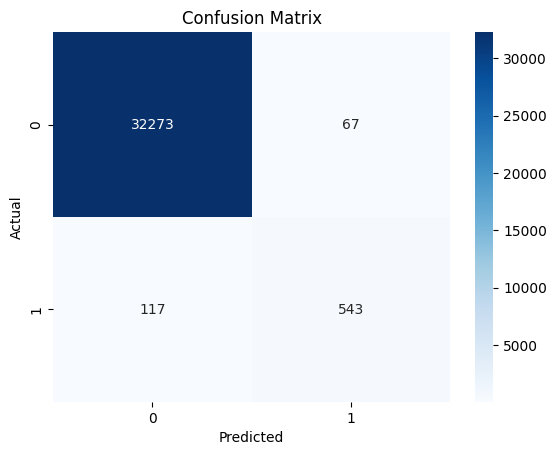

Precision: 0.8901639344262295
Recall: 0.8227272727272728
F1 Score: 0.8551181102362205


In [44]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()

print(f"True Negatives: {true_negatives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"True Positives: {true_positives}")

# Visualize the confusion matrix
confusion_matrix_plot = [[true_negatives, false_positives], [false_negatives, true_positives]]
sns.heatmap(confusion_matrix_plot, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [45]:
# Use your trained model to predict target values for test data
predicted_targets = model.predict(test_df.drop(columns=['Primary key']))

# Create a new column in the test_df to store the predicted target values
submission_df['Target_SVCLinear'] = predicted_targets

# Now, your test_df will have a new column 'Predicted_Target' with the predicted values
# You can save the test_df to a CSV file or use it for further analysis as needed

print("Number of mules predicted :",submission_df['Target_SVCLinear'].sum())


submission_df

Number of mules predicted : 975


,Primary key,country_code,demog_2,income,city_tier,occupation,demog_4,demog_9,demog_13,demog_14,...,others_36,others_37,txn_80,txn_81,demog_40,others_42,demog_43,Target_SGDClassifier,SGD_Proba,Target_SVCLinear
0,9000001,IN,2,5L to 10L,Tier 7,Self_Employed,N,1.0,1.0,0.0,...,1.0,0.0,6.0,9.0,High,0.0,High,0,0.000674,0
1,9000002,IN,1,100001 to 5L,Tier 5,Salaried,N,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,low,0.0,medium,0,0.000004,0
2,9000003,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,0.0,14.0,25.0,low,0.0,medium,0,0.000002,0
3,9000004,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,1.0,0.0,2.0,21.0,medium,0.0,High,0,0.000013,0
4,9000005,IN,1,100001 to 5L,Tier 5,Other,N,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,low,0.0,High,0,0.000017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9049996,IN,2,100001 to 5L,Tier 6,Self_Employed,N,0.0,0.0,0.0,...,1.0,0.0,24.0,2.0,High,0.0,High,0,0.351074,0
49996,9049997,IN,3,100001 to 5L,Tier 2,Self_Employed,N,0.0,1.0,0.0,...,0.0,0.0,11.0,20.0,High,0.0,High,1,0.559772,0
49997,9049998,IN,3,5L to 10L,Rural,Self_Employed,N,0.0,1.0,0.0,...,1.0,0.0,28.0,18.0,low,0.0,High,0,0.069249,0
49998,9049999,IN,6,100001 to 5L,Tier 5,Student,N,0.0,1.0,0.0,...,1.0,0.0,2874.0,7.0,High,0.0,medium,1,0.995298,1


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV


# Obtain decision values
decision_values = model.decision_function(X_train)

# Fit Platt Scaling using logistic regression
platt_scaler = LogisticRegression().fit(decision_values.reshape(-1, 1), y_train)

# Now, for new predictions, convert decision values to probabilities
new_decision_values = model.decision_function(X_test)
probabilities = platt_scaler.predict_proba(new_decision_values.reshape(-1, 1))[:, 1]

# Or, as an alternative, use CalibratedClassifierCV for a more automated approach
calibrated_svcl = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
calibrated_svcl.fit(X_train, y_train)
probabilities = calibrated_svcl.predict_proba(X_test)[:, 1]


In [47]:
submission_df['SVCL_Proba'] = calibrated_svcl.predict_proba(test_df.drop(columns=['Primary key']))[:,1]
submission_df

,Primary key,country_code,demog_2,income,city_tier,occupation,demog_4,demog_9,demog_13,demog_14,...,others_37,txn_80,txn_81,demog_40,others_42,demog_43,Target_SGDClassifier,SGD_Proba,Target_SVCLinear,SVCL_Proba
0,9000001,IN,2,5L to 10L,Tier 7,Self_Employed,N,1.0,1.0,0.0,...,0.0,6.0,9.0,High,0.0,High,0,0.000674,0,7.889216e-05
1,9000002,IN,1,100001 to 5L,Tier 5,Salaried,N,0.0,1.0,0.0,...,0.0,0.0,0.0,low,0.0,medium,0,0.000004,0,8.869733e-05
2,9000003,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,14.0,25.0,low,0.0,medium,0,0.000002,0,1.001488e-07
3,9000004,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,2.0,21.0,medium,0.0,High,0,0.000013,0,5.448155e-07
4,9000005,IN,1,100001 to 5L,Tier 5,Other,N,0.0,1.0,0.0,...,0.0,0.0,0.0,low,0.0,High,0,0.000017,0,1.612279e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9049996,IN,2,100001 to 5L,Tier 6,Self_Employed,N,0.0,0.0,0.0,...,0.0,24.0,2.0,High,0.0,High,0,0.351074,0,2.136482e-01
49996,9049997,IN,3,100001 to 5L,Tier 2,Self_Employed,N,0.0,1.0,0.0,...,0.0,11.0,20.0,High,0.0,High,1,0.559772,0,3.973909e-01
49997,9049998,IN,3,5L to 10L,Rural,Self_Employed,N,0.0,1.0,0.0,...,0.0,28.0,18.0,low,0.0,High,0,0.069249,0,5.289692e-02
49998,9049999,IN,6,100001 to 5L,Tier 5,Student,N,0.0,1.0,0.0,...,0.0,2874.0,7.0,High,0.0,medium,1,0.995298,1,9.996888e-01


In [48]:
# Formatting each value in the column
submission_df['SVCL_Proba'] = submission_df['SVCL_Proba'].apply(lambda x: "{:.5f}".format(x))
submission_df

,Primary key,country_code,demog_2,income,city_tier,occupation,demog_4,demog_9,demog_13,demog_14,...,others_37,txn_80,txn_81,demog_40,others_42,demog_43,Target_SGDClassifier,SGD_Proba,Target_SVCLinear,SVCL_Proba
0,9000001,IN,2,5L to 10L,Tier 7,Self_Employed,N,1.0,1.0,0.0,...,0.0,6.0,9.0,High,0.0,High,0,0.000674,0,0.00008
1,9000002,IN,1,100001 to 5L,Tier 5,Salaried,N,0.0,1.0,0.0,...,0.0,0.0,0.0,low,0.0,medium,0,0.000004,0,0.00009
2,9000003,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,14.0,25.0,low,0.0,medium,0,0.000002,0,0.00000
3,9000004,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,2.0,21.0,medium,0.0,High,0,0.000013,0,0.00000
4,9000005,IN,1,100001 to 5L,Tier 5,Other,N,0.0,1.0,0.0,...,0.0,0.0,0.0,low,0.0,High,0,0.000017,0,0.00002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9049996,IN,2,100001 to 5L,Tier 6,Self_Employed,N,0.0,0.0,0.0,...,0.0,24.0,2.0,High,0.0,High,0,0.351074,0,0.21365
49996,9049997,IN,3,100001 to 5L,Tier 2,Self_Employed,N,0.0,1.0,0.0,...,0.0,11.0,20.0,High,0.0,High,1,0.559772,0,0.39739
49997,9049998,IN,3,5L to 10L,Rural,Self_Employed,N,0.0,1.0,0.0,...,0.0,28.0,18.0,low,0.0,High,0,0.069249,0,0.05290
49998,9049999,IN,6,100001 to 5L,Tier 5,Student,N,0.0,1.0,0.0,...,0.0,2874.0,7.0,High,0.0,medium,1,0.995298,1,0.99969


# **KNN**

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming merged_df contains both numerical and categorical features and 'Target' column
X = merged_df.drop(columns=[primary_key_col, target_col])
y = merged_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Define preprocessing for numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # You can customize this preprocessing as needed
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Use one-hot encoding for categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a KNeighborsClassifier and define your model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier(n_neighbors=5))])  # You can customize the number of neighbors

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
# Get probability estimates for the positive class
y_prob_knn = model.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
model_accuracy['KNeighborsClassifier'] = accuracy

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract the number of false positives (FP)
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]
print(f"Number of False Positives: {false_positives}")
print(f"Number of False Negatives: {false_negatives}")
print(f"Number of True Negative: {conf_matrix[0,0]}")
print(f"Number of True Positive: {conf_matrix[1,1]}")


Accuracy: 0.9941515151515151
Number of False Positives: 70
Number of False Negatives: 123
Number of True Negative: 32270
Number of True Positive: 537


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score


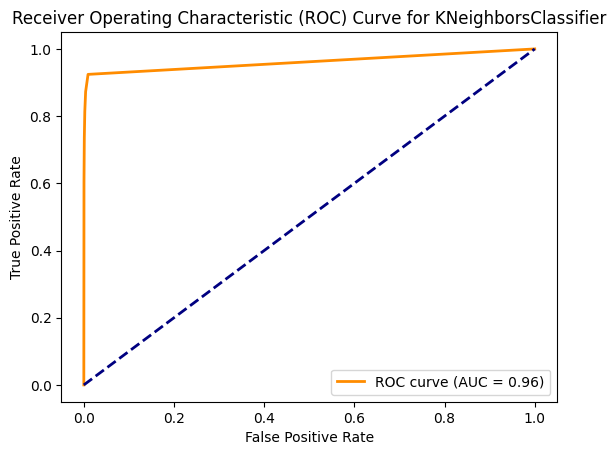

In [51]:
# ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNeighborsClassifier')
plt.legend(loc='lower right')
plt.show()

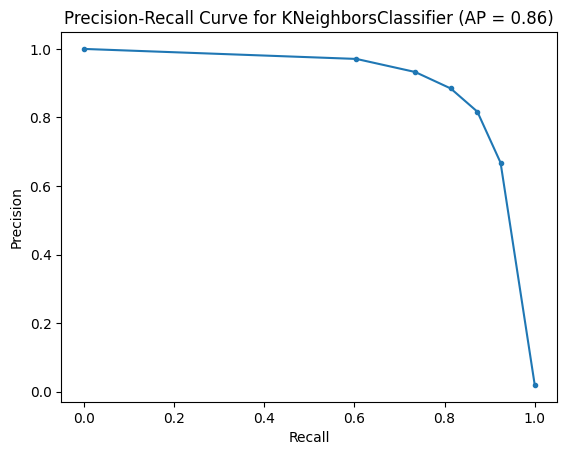

In [52]:
# Precision-Recall curve
precision_knn, recall_knn, thresholds_knn_pr = precision_recall_curve(y_test, y_prob_knn)
average_precision_knn = average_precision_score(y_test, y_prob_knn)

plt.figure()
plt.plot(recall_knn, precision_knn, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for KNeighborsClassifier (AP = {average_precision_knn:.2f})')
plt.show()

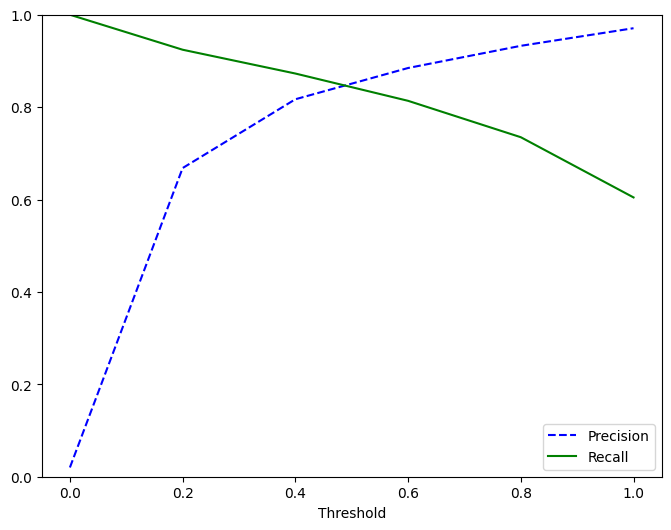

Optimal threshold based on F1 score: 0.6


In [53]:
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assume y_prob[:, 1] is the probability of the positive class
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_knn)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])
plt.show()

# Calculate the F1 score for each threshold
f1_scores = 2*(precisions[:-1]*recalls[:-1])/(precisions[:-1]+recalls[:-1])

# Find the index of the maximum F1 score
optimal_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_index]

print(f"Optimal threshold based on F1 score: {optimal_threshold}")


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score
optimal_pred = (y_prob_knn >= optimal_threshold).astype(int)


# Calculate precision, recall, and F1 score for the optimal threshold
optimal_precision = precision_score(y_test, optimal_pred)
optimal_recall = recall_score(y_test, optimal_pred)
optimal_f1 = f1_score(y_test, optimal_pred)

# Print the precision, recall, and F1 score for the optimal threshold
print(f"Precision at optimal threshold: {optimal_precision}")
print(f"Recall at optimal threshold: {optimal_recall}")
print(f"F1 Score at optimal threshold: {optimal_f1}")

# Calculate the confusion matrix for the optimal threshold
optimal_conf_matrix = confusion_matrix(y_test, optimal_pred)

# Print the confusion matrix
print("Confusion Matrix at optimal threshold:")
print(optimal_conf_matrix)

# Extract values from the confusion matrix
optimal_tn, optimal_fp, optimal_fn, optimal_tp = optimal_conf_matrix.ravel()

# Print the confusion matrix components
print(f"True Negatives at optimal threshold: {optimal_tn}")
print(f"False Positives at optimal threshold: {optimal_fp}")
print(f"False Negatives at optimal threshold: {optimal_fn}")
print(f"True Positives at optimal threshold: {optimal_tp}")


Precision at optimal threshold: 0.8846787479406919
Recall at optimal threshold: 0.8136363636363636
F1 Score at optimal threshold: 0.8476716653512233
Confusion Matrix at optimal threshold:
[[32270    70]
 [  123   537]]
True Negatives at optimal threshold: 32270
False Positives at optimal threshold: 70
False Negatives at optimal threshold: 123
True Positives at optimal threshold: 537


In [55]:
# Use your trained model to predict target values for test data
predicted_targets = model.predict_proba(test_df.drop(columns=['Primary key']))[:,1]
submission_df['KNN_Proba'] = predicted_targets
optimal_pred = (predicted_targets >= optimal_threshold).astype(int)

# Create a new column in the test_df to store the predicted target values
submission_df['Target_KNNClassifier'] = optimal_pred

# Now, your test_df will have a new column 'Predicted_Target' with the predicted values
# You can save the test_df to a CSV file or use it for further analysis as needed

print("Number of mules predicted :",submission_df['Target_KNNClassifier'].sum())


submission_df

Number of mules predicted : 963


,Primary key,country_code,demog_2,income,city_tier,occupation,demog_4,demog_9,demog_13,demog_14,...,txn_81,demog_40,others_42,demog_43,Target_SGDClassifier,SGD_Proba,Target_SVCLinear,SVCL_Proba,KNN_Proba,Target_KNNClassifier
0,9000001,IN,2,5L to 10L,Tier 7,Self_Employed,N,1.0,1.0,0.0,...,9.0,High,0.0,High,0,0.000674,0,0.00008,0.0,0
1,9000002,IN,1,100001 to 5L,Tier 5,Salaried,N,0.0,1.0,0.0,...,0.0,low,0.0,medium,0,0.000004,0,0.00009,0.0,0
2,9000003,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,25.0,low,0.0,medium,0,0.000002,0,0.00000,0.0,0
3,9000004,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,21.0,medium,0.0,High,0,0.000013,0,0.00000,0.0,0
4,9000005,IN,1,100001 to 5L,Tier 5,Other,N,0.0,1.0,0.0,...,0.0,low,0.0,High,0,0.000017,0,0.00002,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9049996,IN,2,100001 to 5L,Tier 6,Self_Employed,N,0.0,0.0,0.0,...,2.0,High,0.0,High,0,0.351074,0,0.21365,0.6,1
49996,9049997,IN,3,100001 to 5L,Tier 2,Self_Employed,N,0.0,1.0,0.0,...,20.0,High,0.0,High,1,0.559772,0,0.39739,0.8,1
49997,9049998,IN,3,5L to 10L,Rural,Self_Employed,N,0.0,1.0,0.0,...,18.0,low,0.0,High,0,0.069249,0,0.05290,0.2,0
49998,9049999,IN,6,100001 to 5L,Tier 5,Student,N,0.0,1.0,0.0,...,7.0,High,0.0,medium,1,0.995298,1,0.99969,1.0,1


# **SVC**

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming merged_df contains both numerical and categorical features and 'Target' column
X = merged_df.drop(columns=[primary_key_col, target_col])
y = merged_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Define preprocessing for numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # You can customize this preprocessing as needed
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Use one-hot encoding for categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create an SVC classifier with a non-linear kernel (e.g., RBF kernel)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC(kernel='rbf'))])

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)




# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
model_accuracy['SVC'] = accuracy
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()

print(f"True Negatives: {true_negatives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"True Positives: {true_positives}")


Accuracy: 0.9943636363636363
True Negatives: 32293
False Positives: 47
False Negatives: 139
True Positives: 521


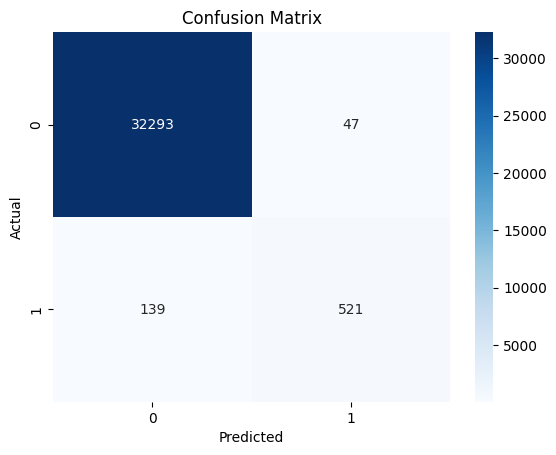

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix_plot = [[true_negatives, false_positives], [false_negatives, true_positives]]
sns.heatmap(confusion_matrix_plot, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


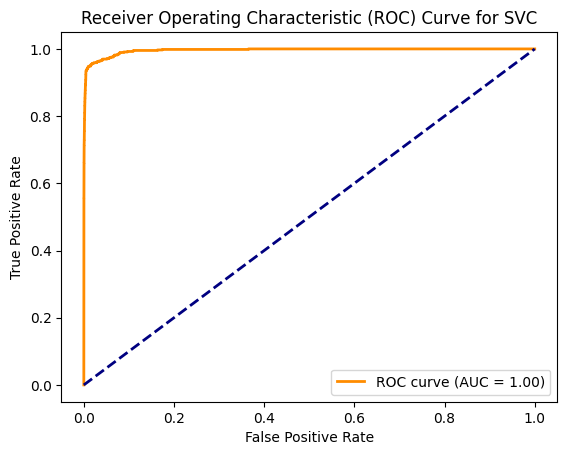

In [58]:

# ROC curve
y_decision_svc = model.decision_function(X_test)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_decision_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.figure()
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC')
plt.legend(loc='lower right')
plt.show()

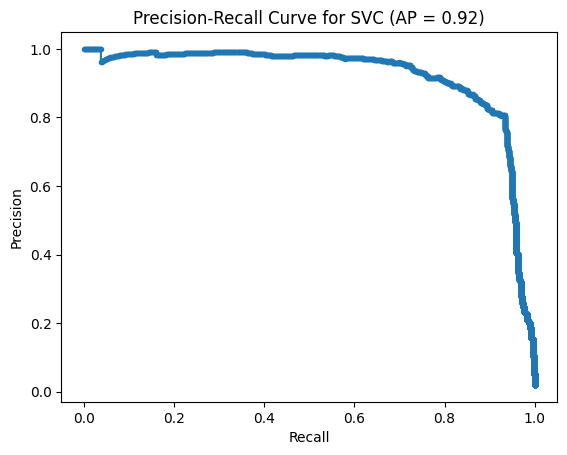

In [59]:
# Precision-Recall curve
precision_svc, recall_svc, thresholds_svc_pr = precision_recall_curve(y_test, y_decision_svc)
average_precision_svc = average_precision_score(y_test, y_decision_svc)

plt.figure()
plt.plot(recall_svc, precision_svc, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for SVC (AP = {average_precision_svc:.2f})')
plt.show()

In [60]:
# Use your trained model to predict target values for test data
predicted_targets = model.predict(test_df.drop(columns=['Primary key']))

# Create a new column in the test_df to store the predicted target values
submission_df['Target_SVC'] = predicted_targets

# Now, your test_df will have a new column 'Predicted_Target' with the predicted values
# You can save the test_df to a CSV file or use it for further analysis as needed

print("Number of mules predicted :",submission_df['Target_SVC'].sum())


submission_df

Number of mules predicted : 895


,Primary key,country_code,demog_2,income,city_tier,occupation,demog_4,demog_9,demog_13,demog_14,...,demog_40,others_42,demog_43,Target_SGDClassifier,SGD_Proba,Target_SVCLinear,SVCL_Proba,KNN_Proba,Target_KNNClassifier,Target_SVC
0,9000001,IN,2,5L to 10L,Tier 7,Self_Employed,N,1.0,1.0,0.0,...,High,0.0,High,0,0.000674,0,0.00008,0.0,0,0
1,9000002,IN,1,100001 to 5L,Tier 5,Salaried,N,0.0,1.0,0.0,...,low,0.0,medium,0,0.000004,0,0.00009,0.0,0,0
2,9000003,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,low,0.0,medium,0,0.000002,0,0.00000,0.0,0,0
3,9000004,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,medium,0.0,High,0,0.000013,0,0.00000,0.0,0,0
4,9000005,IN,1,100001 to 5L,Tier 5,Other,N,0.0,1.0,0.0,...,low,0.0,High,0,0.000017,0,0.00002,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9049996,IN,2,100001 to 5L,Tier 6,Self_Employed,N,0.0,0.0,0.0,...,High,0.0,High,0,0.351074,0,0.21365,0.6,1,0
49996,9049997,IN,3,100001 to 5L,Tier 2,Self_Employed,N,0.0,1.0,0.0,...,High,0.0,High,1,0.559772,0,0.39739,0.8,1,0
49997,9049998,IN,3,5L to 10L,Rural,Self_Employed,N,0.0,1.0,0.0,...,low,0.0,High,0,0.069249,0,0.05290,0.2,0,0
49998,9049999,IN,6,100001 to 5L,Tier 5,Student,N,0.0,1.0,0.0,...,High,0.0,medium,1,0.995298,1,0.99969,1.0,1,1


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
# Fit Platt Scaling using logistic regression
# Get decision function values for the positive class
y_decision_svc = model.decision_function(X_train)
platt_scaler = LogisticRegression().fit(y_decision_svc.reshape(-1, 1), y_train)

# Now, for new predictions, convert decision values to probabilities
new_decision_values = model.decision_function(X_test)
probabilities = platt_scaler.predict_proba(new_decision_values.reshape(-1, 1))[:, 1]

# Or, as an alternative, use CalibratedClassifierCV for a more automated approach
calibrated_svc = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
calibrated_svc.fit(X_train, y_train)
probabilities = calibrated_svc.predict_proba(X_test)[:, 1]

In [62]:
probabilities

array([1.29886029e-05, 7.12603768e-04, 9.26377081e-06, ...,
       1.36648301e-04, 1.89336207e-05, 1.02847136e-05])

In [63]:
submission_df['SVC_Proba'] = calibrated_svc.predict_proba(test_df.drop(columns=['Primary key']))[:, 1]

In [64]:
submission_df

,Primary key,country_code,demog_2,income,city_tier,occupation,demog_4,demog_9,demog_13,demog_14,...,others_42,demog_43,Target_SGDClassifier,SGD_Proba,Target_SVCLinear,SVCL_Proba,KNN_Proba,Target_KNNClassifier,Target_SVC,SVC_Proba
0,9000001,IN,2,5L to 10L,Tier 7,Self_Employed,N,1.0,1.0,0.0,...,0.0,High,0,0.000674,0,0.00008,0.0,0,0,0.000368
1,9000002,IN,1,100001 to 5L,Tier 5,Salaried,N,0.0,1.0,0.0,...,0.0,medium,0,0.000004,0,0.00009,0.0,0,0,0.000007
2,9000003,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,medium,0,0.000002,0,0.00000,0.0,0,0,0.000014
3,9000004,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.0,High,0,0.000013,0,0.00000,0.0,0,0,0.000958
4,9000005,IN,1,100001 to 5L,Tier 5,Other,N,0.0,1.0,0.0,...,0.0,High,0,0.000017,0,0.00002,0.0,0,0,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9049996,IN,2,100001 to 5L,Tier 6,Self_Employed,N,0.0,0.0,0.0,...,0.0,High,0,0.351074,0,0.21365,0.6,1,0,0.463838
49996,9049997,IN,3,100001 to 5L,Tier 2,Self_Employed,N,0.0,1.0,0.0,...,0.0,High,1,0.559772,0,0.39739,0.8,1,0,0.505670
49997,9049998,IN,3,5L to 10L,Rural,Self_Employed,N,0.0,1.0,0.0,...,0.0,High,0,0.069249,0,0.05290,0.2,0,0,0.008226
49998,9049999,IN,6,100001 to 5L,Tier 5,Student,N,0.0,1.0,0.0,...,0.0,medium,1,0.995298,1,0.99969,1.0,1,1,0.847313


# **Random Forest**

In [65]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming merged_df contains both numerical and categorical features and 'Target' column
X = merged_df.drop(columns=[primary_key_col, target_col])
y = merged_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Define preprocessing for numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # You can customize this preprocessing as needed
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Use one-hot encoding for categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a Random Forest classifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
model_accuracy['RandomForestClassifier'] = accuracy

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()

print(f"True Negatives: {true_negatives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"True Positives: {true_positives}")


Accuracy: 0.9961212121212121
True Negatives: 32290
False Positives: 50
False Negatives: 78
True Positives: 582


### Confusion Matrix based on `binary` prediction

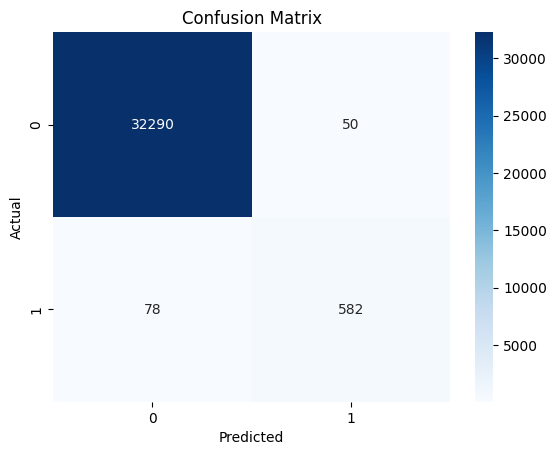

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix_plot = [[true_negatives, false_positives], [false_negatives, true_positives]]
sns.heatmap(confusion_matrix_plot, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


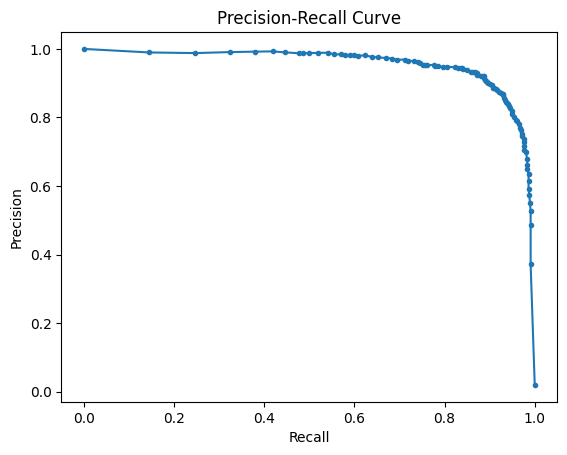

In [67]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:,1])
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


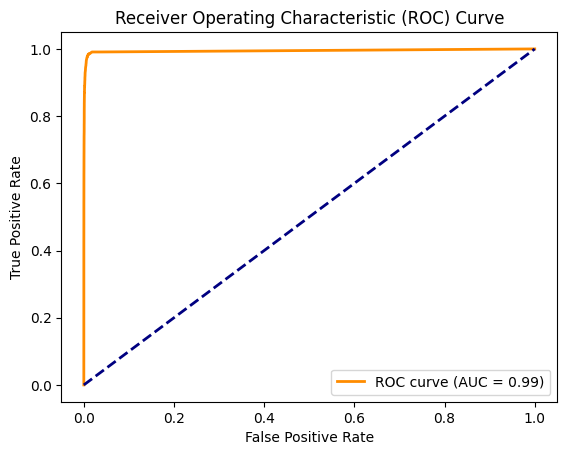

In [68]:
# For probabilities

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


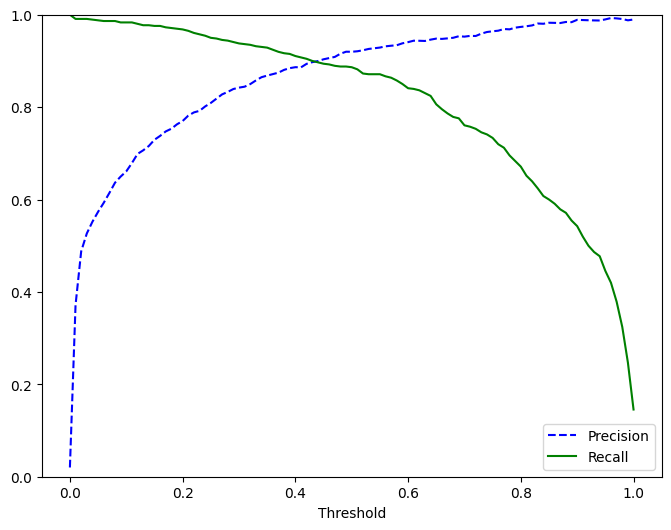

Optimal threshold based on F1 score: 0.49


In [69]:
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assume y_prob[:, 1] is the probability of the positive class
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob[:, 1])

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])
plt.show()

# Calculate the F1 score for each threshold
f1_scores = 2*(precisions[:-1]*recalls[:-1])/(precisions[:-1]+recalls[:-1])

# Find the index of the maximum F1 score
optimal_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_index]

print(f"Optimal threshold based on F1 score: {optimal_threshold}")


In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score
optimal_pred = (y_prob[:, 1] >= optimal_threshold).astype(int)


# Calculate precision, recall, and F1 score for the optimal threshold
optimal_precision = precision_score(y_test, optimal_pred)
optimal_recall = recall_score(y_test, optimal_pred)
optimal_f1 = f1_score(y_test, optimal_pred)

# Print the precision, recall, and F1 score for the optimal threshold
print(f"Precision at optimal threshold: {optimal_precision}")
print(f"Recall at optimal threshold: {optimal_recall}")
print(f"F1 Score at optimal threshold: {optimal_f1}")

# Calculate the confusion matrix for the optimal threshold
optimal_conf_matrix = confusion_matrix(y_test, optimal_pred)

# Print the confusion matrix
print("Confusion Matrix at optimal threshold:")
print(optimal_conf_matrix)

# Extract values from the confusion matrix
optimal_tn, optimal_fp, optimal_fn, optimal_tp = optimal_conf_matrix.ravel()

# Print the confusion matrix components
print(f"True Negatives at optimal threshold: {optimal_tn}")
print(f"False Positives at optimal threshold: {optimal_fp}")
print(f"False Negatives at optimal threshold: {optimal_fn}")
print(f"True Positives at optimal threshold: {optimal_tp}")


Precision at optimal threshold: 0.9199372056514914
Recall at optimal threshold: 0.8878787878787879
F1 Score at optimal threshold: 0.9036237471087124
Confusion Matrix at optimal threshold:
[[32289    51]
 [   74   586]]
True Negatives at optimal threshold: 32289
False Positives at optimal threshold: 51
False Negatives at optimal threshold: 74
True Positives at optimal threshold: 586


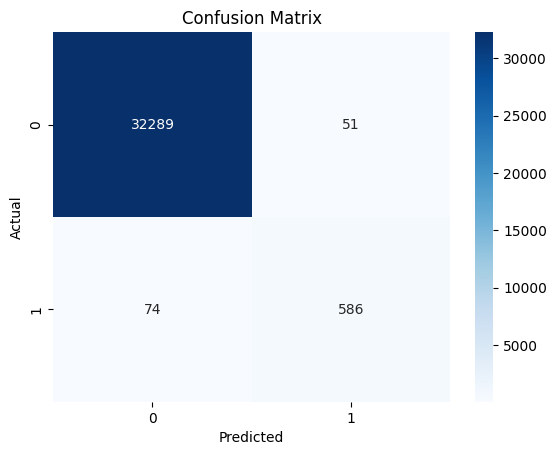

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix_plot = [[optimal_tn, optimal_fp], [optimal_fn, optimal_tp]]
sns.heatmap(confusion_matrix_plot, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [72]:
#optimal_pred = (y_prob[:, 1] >= optimal_threshold).astype(int)

# Use your trained model to predict target values for test data
predicted_targets = model.predict_proba(test_df.drop(columns=['Primary key']))[:,1]
submission_df['RandomForest_Proba'] = predicted_targets
optimal_prediction = (predicted_targets >= optimal_threshold).astype(int)

# Create a new column in the test_df to store the predicted target values
submission_df['Target_RandomForest'] = optimal_prediction

# Now, your test_df will have a new column 'Predicted_Target' with the predicted values
# You can save the test_df to a CSV file or use it for further analysis as needed

print("Number of mules predicted :",submission_df['Target_RandomForest'].sum())


submission_df

Number of mules predicted : 1001


,Primary key,country_code,demog_2,income,city_tier,occupation,demog_4,demog_9,demog_13,demog_14,...,Target_SGDClassifier,SGD_Proba,Target_SVCLinear,SVCL_Proba,KNN_Proba,Target_KNNClassifier,Target_SVC,SVC_Proba,RandomForest_Proba,Target_RandomForest
0,9000001,IN,2,5L to 10L,Tier 7,Self_Employed,N,1.0,1.0,0.0,...,0,0.000674,0,0.00008,0.0,0,0,0.000368,0.00,0
1,9000002,IN,1,100001 to 5L,Tier 5,Salaried,N,0.0,1.0,0.0,...,0,0.000004,0,0.00009,0.0,0,0,0.000007,0.00,0
2,9000003,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0,0.000002,0,0.00000,0.0,0,0,0.000014,0.00,0
3,9000004,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0,0.000013,0,0.00000,0.0,0,0,0.000958,0.00,0
4,9000005,IN,1,100001 to 5L,Tier 5,Other,N,0.0,1.0,0.0,...,0,0.000017,0,0.00002,0.0,0,0,0.000014,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9049996,IN,2,100001 to 5L,Tier 6,Self_Employed,N,0.0,0.0,0.0,...,0,0.351074,0,0.21365,0.6,1,0,0.463838,0.55,1
49996,9049997,IN,3,100001 to 5L,Tier 2,Self_Employed,N,0.0,1.0,0.0,...,1,0.559772,0,0.39739,0.8,1,0,0.505670,0.65,1
49997,9049998,IN,3,5L to 10L,Rural,Self_Employed,N,0.0,1.0,0.0,...,0,0.069249,0,0.05290,0.2,0,0,0.008226,0.25,0
49998,9049999,IN,6,100001 to 5L,Tier 5,Student,N,0.0,1.0,0.0,...,1,0.995298,1,0.99969,1.0,1,1,0.847313,0.97,1


# Final Probability Calculation

In [97]:
submission_df['SVCL_Proba'] = submission_df['SVCL_Proba'].astype(float)
submission_df['FINAL_PROBA'] = (submission_df['SGD_Proba']*model_accuracy['SGDClassifier'] + submission_df['SVC_Proba']*model_accuracy['SVC'] + submission_df['SVCL_Proba']*model_accuracy['LinearSVC']+ submission_df['KNN_Proba']*model_accuracy['KNeighborsClassifier']+submission_df['RandomForest_Proba']*model_accuracy['RandomForestClassifier'])/(model_accuracy['SGDClassifier']+model_accuracy['SVC']+model_accuracy['LinearSVC']+model_accuracy['KNeighborsClassifier']+model_accuracy['RandomForestClassifier'])



In [98]:
submission_df

,Primary key,country_code,demog_2,income,city_tier,occupation,demog_4,demog_9,demog_13,demog_14,...,SGD_Proba,Target_SVCLinear,SVCL_Proba,KNN_Proba,Target_KNNClassifier,Target_SVC,SVC_Proba,RandomForest_Proba,Target_RandomForest,FINAL_PROBA
0,9000001,IN,2,5L to 10L,Tier 7,Self_Employed,N,1.0,1.0,0.0,...,0.000674,0,0.00008,0.0,0,0,0.000368,0.00,0,0.000224
1,9000002,IN,1,100001 to 5L,Tier 5,Salaried,N,0.0,1.0,0.0,...,0.000004,0,0.00009,0.0,0,0,0.000007,0.00,0,0.000020
2,9000003,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.000002,0,0.00000,0.0,0,0,0.000014,0.00,0,0.000003
3,9000004,IN,1,100001 to 5L,Tier 1,Other,N,0.0,1.0,0.0,...,0.000013,0,0.00000,0.0,0,0,0.000958,0.00,0,0.000194
4,9000005,IN,1,100001 to 5L,Tier 5,Other,N,0.0,1.0,0.0,...,0.000017,0,0.00002,0.0,0,0,0.000014,0.00,0,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9049996,IN,2,100001 to 5L,Tier 6,Self_Employed,N,0.0,0.0,0.0,...,0.351074,0,0.21365,0.6,1,0,0.463838,0.55,1,0.435764
49996,9049997,IN,3,100001 to 5L,Tier 2,Self_Employed,N,0.0,1.0,0.0,...,0.559772,0,0.39739,0.8,1,0,0.505670,0.65,1,0.582585
49997,9049998,IN,3,5L to 10L,Rural,Self_Employed,N,0.0,1.0,0.0,...,0.069249,0,0.05290,0.2,0,0,0.008226,0.25,0,0.116130
49998,9049999,IN,6,100001 to 5L,Tier 5,Student,N,0.0,1.0,0.0,...,0.995298,1,0.99969,1.0,1,1,0.847313,0.97,1,0.962453


In [100]:
submission_df.to_excel('submission.xlsx')